<a href="https://colab.research.google.com/github/dlbkv/AI-Step/blob/master/module2/lab_5_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module2/data/weatherHistory.csv")

In [ ]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.


# Завдання 1
Виведіть основні числові характеристики для числових ознак. Що потрібно зробити з стовпчиком `Loud Cover`?

In [ ]:
df.describe()
# судя их полученных данных можно сказать, что столбец loud cover не несет
# никакой полезной информации (везде нули), посему его можно удалить
df.drop('Loud Cover',axis=1, inplace=True)

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


# Завдання 2
Подивіться на отриману таблицю, особливо на характеристики `min` та `max`, для яких ознак потрібно побудувати ящики з вусами в першу чергу? Для решти намалюйте гістограми.


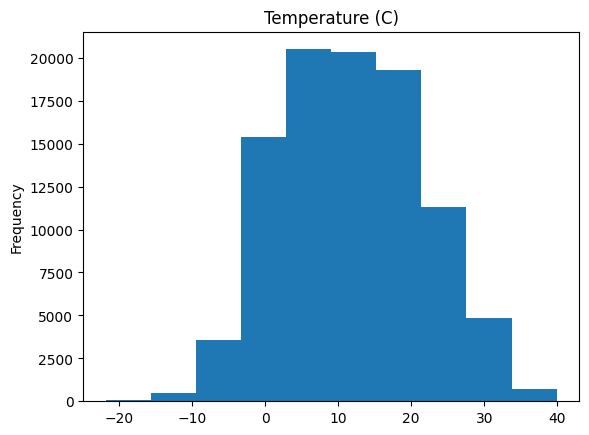

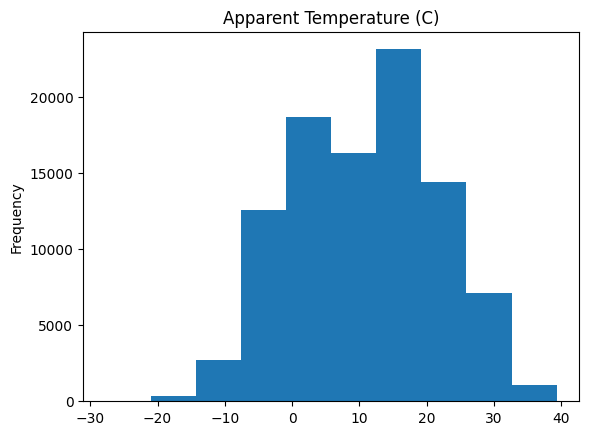

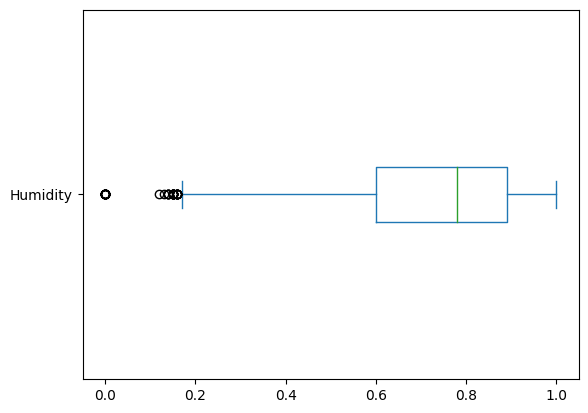

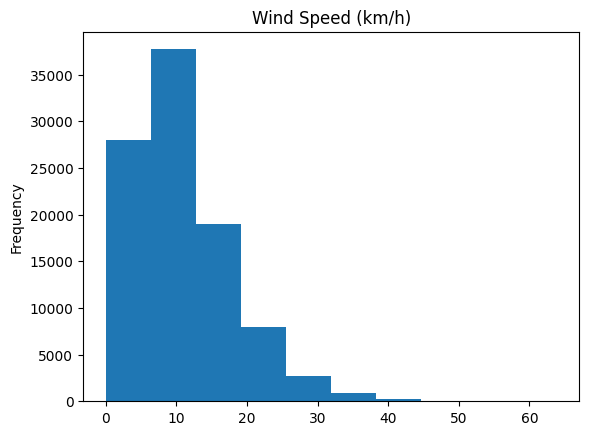

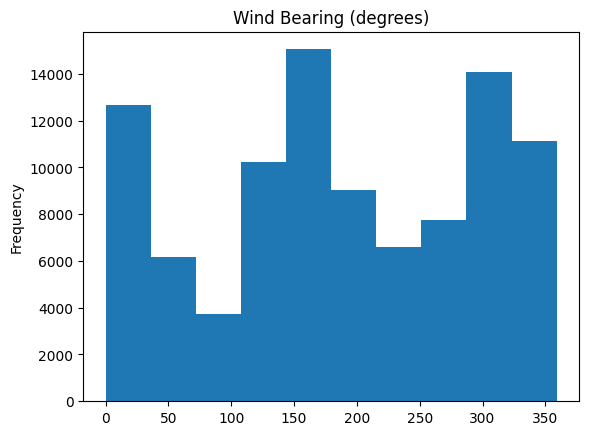

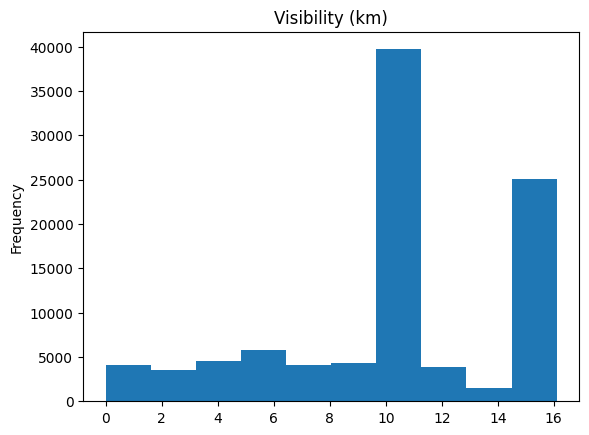

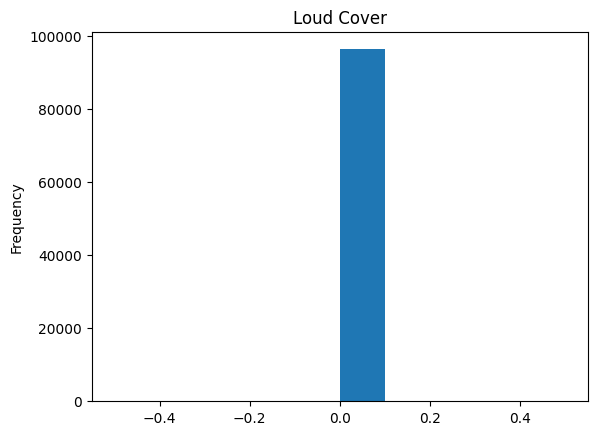

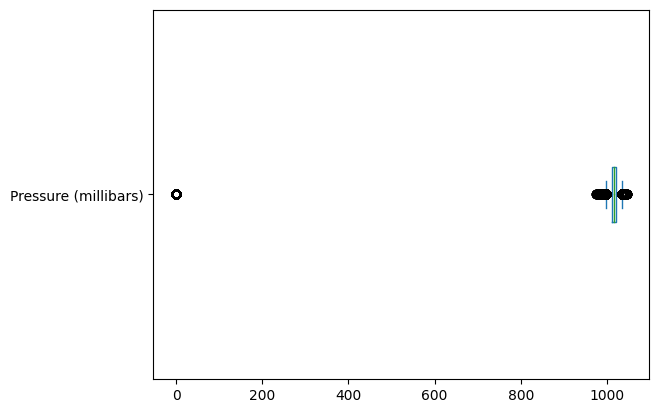

In [ ]:
for column_name in df.columns:
  if df[column_name].dtype in (int, float):
    if column_name in ['Humidity', 'Pressure (millibars)']:
      df[column_name].plot(kind='box', vert=False)
    else:
      df[column_name].plot(kind='hist', title=column_name)
    plt.show()


# Завдання 3
Чи потрібно застосувати квантильний алгоритм для видалення викидів? Якщо так то застосуйте, інакше, що на вашу думку потрібно зробити?

In [ ]:
def remove_outliers(df, column_name):
  column = df[column_name]
  q1 = column.quantile(q=0.25)
  q3 = column.quantile(q=0.75)
  iqr = q3 - q1
  lower = q1 - 1.5*iqr
  upper = q3 + 1.5*iqr
  mask = (column>=lower) & (column<=upper)
  return df[mask]

In [ ]:
column_names_to_remove = ['Humidity', 'Pressure (millibars)']
for column_name in column_names_to_remove:
  df = remove_outliers(df, column_name)


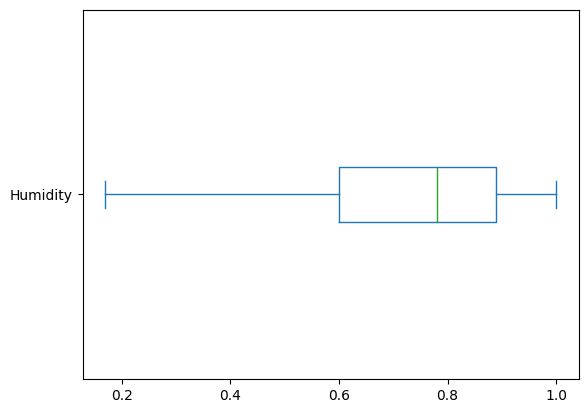

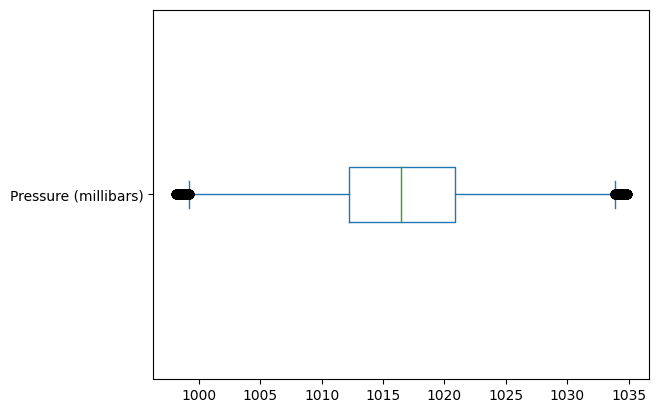

In [ ]:
df['Humidity'].plot(kind='box', vert=False)
plt.show()
df['Pressure (millibars)'].plot(kind='box', vert=False)
plt.show()

# Завдання 4
Намалюйте матрицю кореляцій. Для найбільш корельованих ознак намалюйте точкову діаграму

In [ ]:

df.corr(method='pearson')

<ipython-input-32-432dd9d4238b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')


,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Temperature (C),1.000000,0.992815,-0.639523,-0.003269,0.027501,0.382141,-0.296316
Apparent Temperature (C),0.992815,1.000000,-0.609240,-0.066692,0.026835,0.372107,-0.277912
Humidity,-0.639523,-0.609240,1.000000,-0.227342,0.000818,-0.362146,0.035757
Wind Speed (km/h),-0.003269,-0.066692,-0.227342,1.000000,0.104083,0.091303,-0.215641
Wind Bearing (degrees),0.027501,0.026835,0.000818,0.104083,1.000000,0.049891,-0.080756
Visibility (km),0.382141,0.372107,-0.362146,0.091303,0.049891,1.000000,-0.145085
Pressure (millibars),-0.296316,-0.277912,0.035757,-0.215641,-0.080756,-0.145085,1.000000


<Axes: xlabel='Temperature (C)', ylabel='Apparent Temperature (C)'>

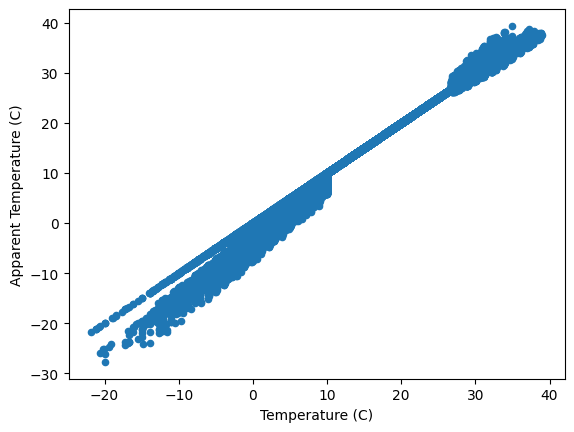

In [ ]:
df.plot(kind='scatter', x='Temperature (C)', y='Apparent Temperature (C)')

<Axes: xlabel='Humidity', ylabel='Temperature (C)'>

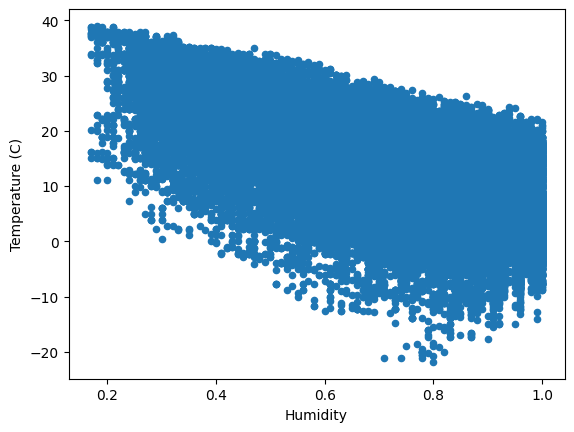

In [ ]:
df.plot(kind='scatter', x='Humidity', y='Temperature (C)')

<Axes: xlabel='Humidity', ylabel='Apparent Temperature (C)'>

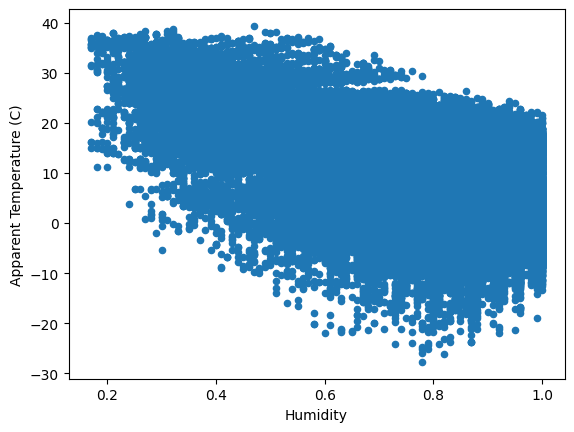

In [ ]:
df.plot(kind='scatter', x='Humidity', y='Apparent Temperature (C)')

# Завдання 5
Виведіть характеристики для категоріальних ознак

In [ ]:
df.info()
df.describe(include='object')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92011 entries, 0 to 96452
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            92011 non-null  object 
 1   Summary                   92011 non-null  object 
 2   Precip Type               91513 non-null  object 
 3   Temperature (C)           92011 non-null  float64
 4   Apparent Temperature (C)  92011 non-null  float64
 5   Humidity                  92011 non-null  float64
 6   Wind Speed (km/h)         92011 non-null  float64
 7   Wind Bearing (degrees)    92011 non-null  float64
 8   Visibility (km)           92011 non-null  float64
 9   Pressure (millibars)      92011 non-null  float64
 10  Daily Summary             92011 non-null  object 
dtypes: float64(7), object(4)
memory usage: 10.4+ MB


,Formatted Date,Summary,Precip Type,Daily Summary
count,92011,92011,91513,92011
unique,91987,27,2,213
top,2010-08-02 09:00:00.000 +0200,Partly Cloudy,rain,Mostly cloudy throughout the day.
freq,2,31188,82286,19580


# Завдання 6
Виведіть групові ящики з вусами по одній(або декількох) категоріальних ознак. Що по них можна сказати?

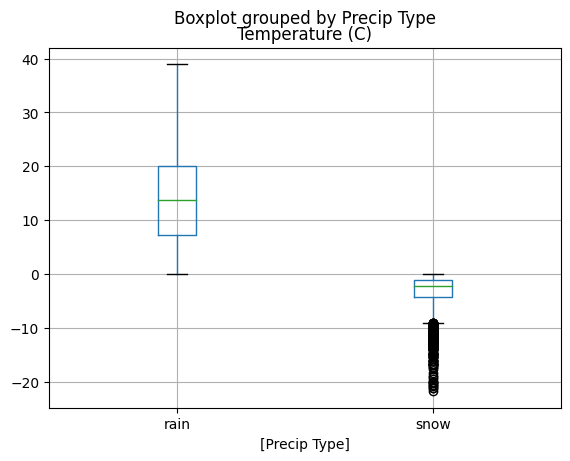

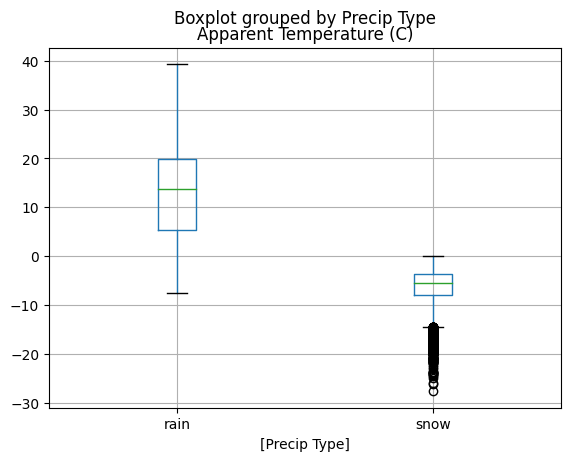

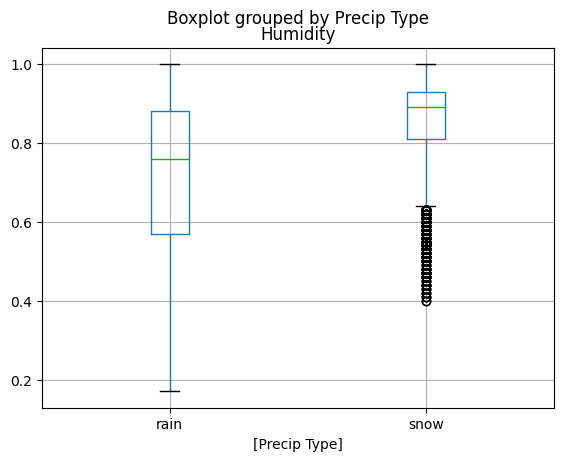

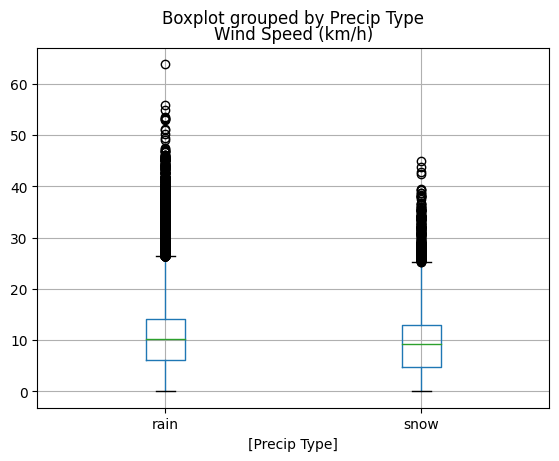

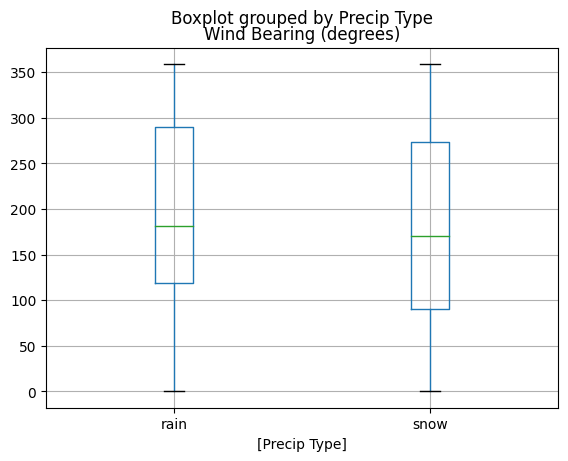

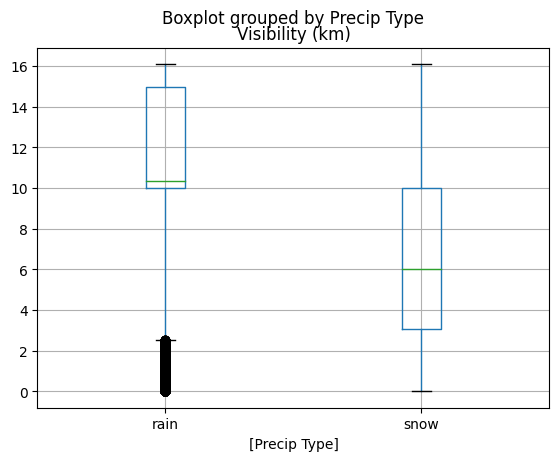

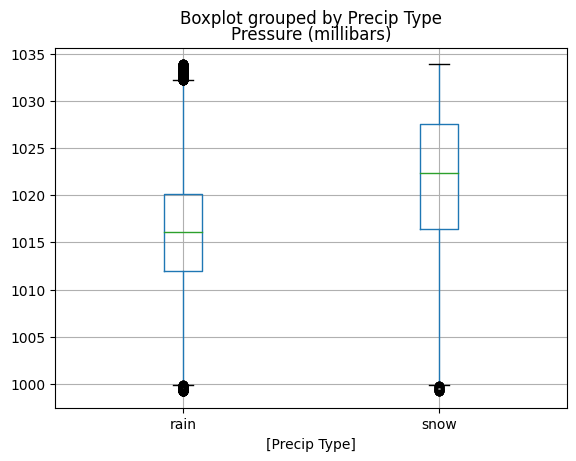

In [ ]:
num_columns = df.select_dtypes(include='number').columns
for column_name in num_columns:
  df[[column_name, 'Precip Type']].boxplot(by='Precip Type')
  plt.show()